In [1]:
from src.Generator import Generator
from src.Discriminator import Discriminator
from src.utils.tools import * 
from src.data.GenLoaders import *
from src.training.trainer import *
import torch
from collections import Counter
torch.manual_seed(0); # Set for testing purposes, please do not change!

c:\Users\nfier\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Counter({0: 14542, 2: 14523, 4: 10534, 3: 9599, 1: 1396})
Epoch 1/200


c:\Users\nfier\anaconda3\lib\site-packages\torch\nn\modules\container.py:204: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


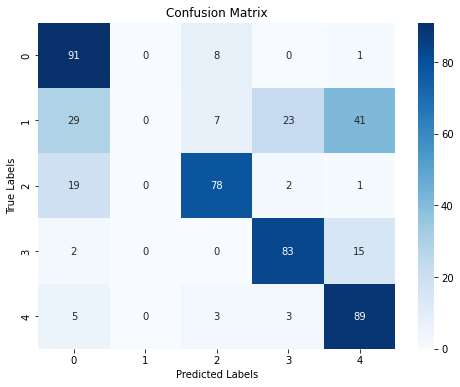

Val loss: 1.2182898372411728, Val acc: 0.682
Epoch 2/200


c:\Users\nfier\anaconda3\lib\site-packages\torch\nn\modules\container.py:204: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


KeyboardInterrupt: 

In [2]:
epochs=200
train_loader,val_loader=get_training_loaders(batch_size=32,file_name="stamp_dataset_28.pkl",label_as_strings=False,with_labels=True)
labels = train_loader.dataset.labels

# Assuming labels is a list or array containing your class labels
class_counts = Counter(labels)

# class_counts will be a dictionary where keys are class labels, and values are counts
print(class_counts)

#Training
curves=trainer(train_loader,val_loader,epochs=epochs)

## Entrenamiento con datos generados por GANs

In [3]:
device = 'cuda'
z_dim = 64


5000 supernovas

In [4]:
num_img=5000

gen_1 = Generator(z_dim).to(device)
gen_1.load_state_dict(torch.load('dcgan'))
gen = Generator(z_dim).to(device)
gen.load_state_dict(torch.load('wgangp'))
fake_noise = get_noise(num_img, z_dim, device=device)
fake_dcgan = gen_1(fake_noise)
fake_wgangp= gen(fake_noise)

tensor([14542,  6396, 14523,  9599, 10534])
Epoch 1/200


/home/nfierroflo/anaconda3/envs/gans/lib/python3.11/site-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Val loss: 1.2034880220890045, Val acc: 0.702
Epoch 2/200
Val loss: 1.1875851303339005, Val acc: 0.714
Epoch 3/200
Val loss: 1.1887671649456024, Val acc: 0.714
Epoch 4/200
Val loss: 1.1896032467484474, Val acc: 0.71
Epoch 5/200
Val loss: 1.1947921961545944, Val acc: 0.712
Epoch 6/200
Val loss: 1.1868735253810883, Val acc: 0.712
Epoch 7/200
Val loss: 1.175460085272789, Val acc: 0.724
Epoch 8/200
Val loss: 1.1674697324633598, Val acc: 0.734
Epoch 9/200
Val loss: 1.1146571151912212, Val acc: 0.782
Epoch 10/200
Val loss: 1.1209456622600555, Val acc: 0.778
Epoch 11/200
Val loss: 1.1041331365704536, Val acc: 0.8
Epoch 12/200
Val loss: 1.1214682012796402, Val acc: 0.78
Epoch 13/200
Val loss: 1.1297516338527203, Val acc: 0.774
Epoch 14/200
Val loss: 1.1281372234225273, Val acc: 0.774
Epoch 15/200
Val loss: 1.0828447863459587, Val acc: 0.82
Epoch 16/200
Val loss: 1.0812073834240437, Val acc: 0.818
Epoch 17/200
Val loss: 1.0878731831908226, Val acc: 0.814
Epoch 18/200
Val loss: 1.0950173772871494

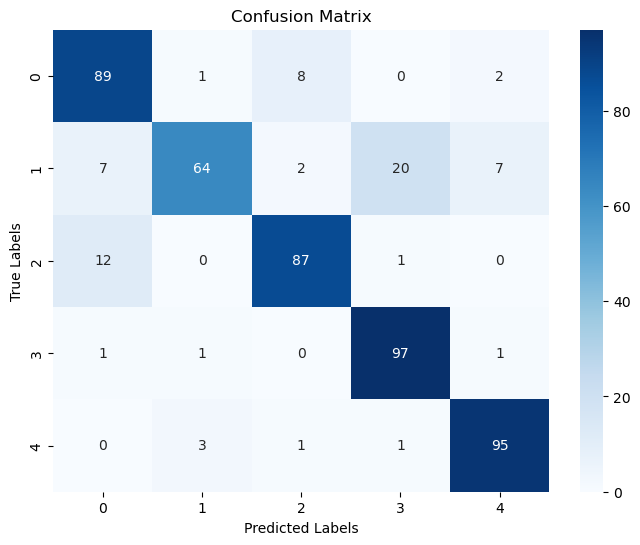

Val loss: 1.0381571650505066, Val acc: 0.864
Tiempo total de entrenamiento: 4609.8724 [s]


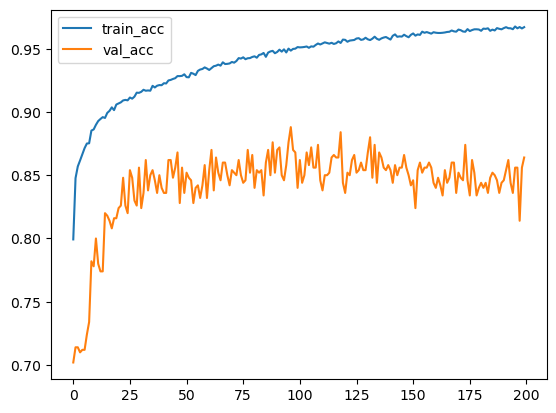

In [5]:
train_loader,val_loader=get_training_loaders(synthetic_SN=fake_dcgan.detach().cpu(),batch_size=32,file_name="stamp_dataset_28.pkl",label_as_strings=False,with_labels=True)
print(torch.bincount(train_loader.dataset.labels.to(torch.int)))
curves=trainer(train_loader,val_loader,epochs=epochs)

tensor([14542,  6396, 14523,  9599, 10534])
Epoch 1/200


/home/nfierroflo/anaconda3/envs/gans/lib/python3.11/site-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Val loss: 1.188784934580326, Val acc: 0.71
Epoch 2/200
Val loss: 1.1971885487437248, Val acc: 0.7
Epoch 3/200
Val loss: 1.1887646540999413, Val acc: 0.71
Epoch 4/200
Val loss: 1.2003116235136986, Val acc: 0.702
Epoch 5/200
Val loss: 1.1955592557787895, Val acc: 0.708
Epoch 6/200
Val loss: 1.1874330639839172, Val acc: 0.714
Epoch 7/200
Val loss: 1.2194160893559456, Val acc: 0.684
Epoch 8/200
Val loss: 1.183100402355194, Val acc: 0.72
Epoch 9/200
Val loss: 1.1861006245017052, Val acc: 0.716
Epoch 10/200
Val loss: 1.1830772161483765, Val acc: 0.724
Epoch 11/200
Val loss: 1.1882886067032814, Val acc: 0.714
Epoch 12/200
Val loss: 1.185685746371746, Val acc: 0.718
Epoch 13/200
Val loss: 1.1799956932663918, Val acc: 0.72
Epoch 14/200
Val loss: 1.1742678061127663, Val acc: 0.73
Epoch 15/200
Val loss: 1.1839417964220047, Val acc: 0.718
Epoch 16/200
Val loss: 1.1792869195342064, Val acc: 0.722
Epoch 17/200
Val loss: 1.180450662970543, Val acc: 0.718
Epoch 18/200
Val loss: 1.1792489364743233, Val

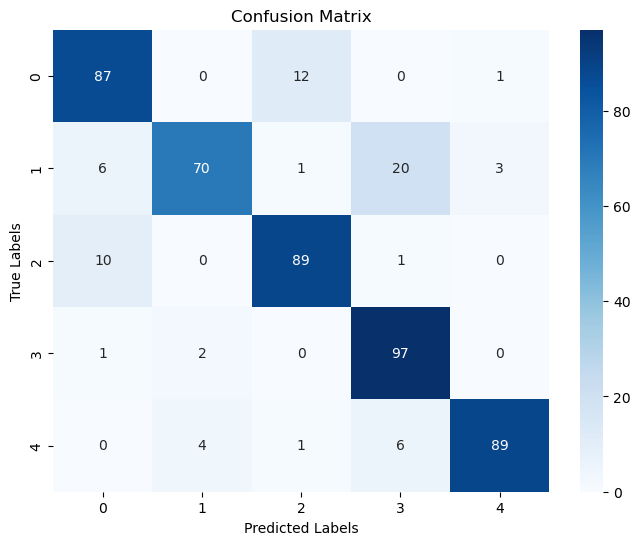

Val loss: 1.0389365889132023, Val acc: 0.864
Tiempo total de entrenamiento: 4597.6349 [s]


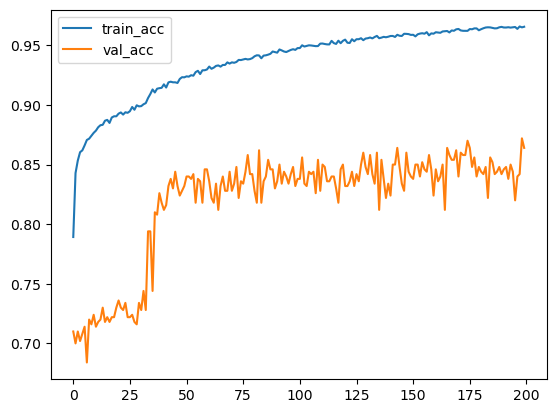

In [6]:
train_loader,val_loader=get_training_loaders(synthetic_SN=fake_wgangp.detach().cpu(),batch_size=32,file_name="stamp_dataset_28.pkl",label_as_strings=False,with_labels=True)
print(torch.bincount(train_loader.dataset.labels.to(torch.int)))
curves=trainer(train_loader,val_loader,epochs=epochs)

10000 supernovas

In [7]:
num_img = 10000

gen_1 = Generator(z_dim).to(device)
gen_1.load_state_dict(torch.load('dcgan'))
gen = Generator(z_dim).to(device)
gen.load_state_dict(torch.load('wgangp'))
fake_noise = get_noise(num_img, z_dim, device=device)
fake_dcgan = gen_1(fake_noise)
fake_wgangp= gen(fake_noise)

tensor([14542, 11396, 14523,  9599, 10534])
Epoch 1/200


/home/nfierroflo/anaconda3/envs/gans/lib/python3.11/site-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Val loss: 1.2085599228739738, Val acc: 0.694
Epoch 2/200
Val loss: 1.2045767456293106, Val acc: 0.698
Epoch 3/200
Val loss: 1.194113053381443, Val acc: 0.706
Epoch 4/200
Val loss: 1.1983972489833832, Val acc: 0.702
Epoch 5/200
Val loss: 1.1991432011127472, Val acc: 0.704
Epoch 6/200
Val loss: 1.1822338998317719, Val acc: 0.722
Epoch 7/200
Val loss: 1.2037617564201355, Val acc: 0.698
Epoch 8/200
Val loss: 1.1887904927134514, Val acc: 0.712
Epoch 9/200
Val loss: 1.1837978139519691, Val acc: 0.718
Epoch 10/200
Val loss: 1.182230956852436, Val acc: 0.72
Epoch 11/200
Val loss: 1.1783510819077492, Val acc: 0.728
Epoch 12/200
Val loss: 1.179852046072483, Val acc: 0.724
Epoch 13/200
Val loss: 1.1820228025317192, Val acc: 0.722
Epoch 14/200
Val loss: 1.1737084314227104, Val acc: 0.73
Epoch 15/200
Val loss: 1.179231621325016, Val acc: 0.726
Epoch 16/200
Val loss: 1.169362585991621, Val acc: 0.734
Epoch 17/200
Val loss: 1.1686404570937157, Val acc: 0.732
Epoch 18/200
Val loss: 1.1844573616981506,

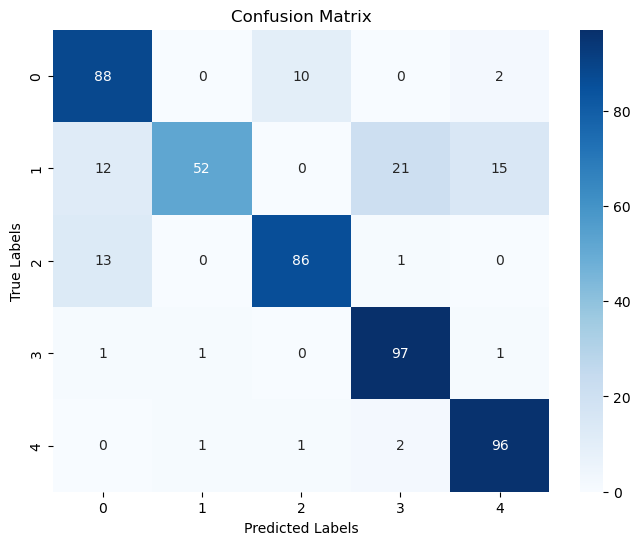

Val loss: 1.065060369670391, Val acc: 0.838
Tiempo total de entrenamiento: 5017.1609 [s]


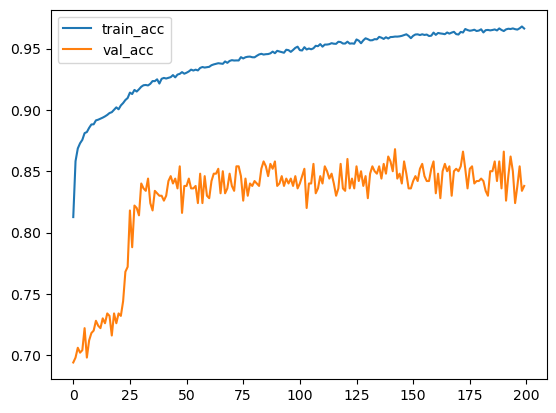

In [8]:
train_loader,val_loader=get_training_loaders(synthetic_SN=fake_dcgan.detach().cpu(),batch_size=32,file_name="stamp_dataset_28.pkl",label_as_strings=False,with_labels=True)
print(torch.bincount(train_loader.dataset.labels.to(torch.int)))
curves=trainer(train_loader,val_loader,epochs=epochs)

tensor([14542, 11396, 14523,  9599, 10534])
Epoch 1/200


/home/nfierroflo/anaconda3/envs/gans/lib/python3.11/site-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Val loss: 1.2142920419573784, Val acc: 0.686
Epoch 2/200
Val loss: 1.193360261619091, Val acc: 0.708
Epoch 3/200
Val loss: 1.196754440665245, Val acc: 0.71
Epoch 4/200
Val loss: 1.210377924144268, Val acc: 0.694
Epoch 5/200
Val loss: 1.184910073876381, Val acc: 0.72
Epoch 6/200
Val loss: 1.19952642172575, Val acc: 0.706
Epoch 7/200
Val loss: 1.2071943655610085, Val acc: 0.694
Epoch 8/200
Val loss: 1.1959810927510262, Val acc: 0.71
Epoch 9/200
Val loss: 1.1879987120628357, Val acc: 0.718
Epoch 10/200
Val loss: 1.1994696855545044, Val acc: 0.706
Epoch 11/200
Val loss: 1.1777576729655266, Val acc: 0.726
Epoch 12/200
Val loss: 1.1966926977038383, Val acc: 0.704
Epoch 13/200
Val loss: 1.1839610561728477, Val acc: 0.716
Epoch 14/200
Val loss: 1.1740313470363617, Val acc: 0.726
Epoch 15/200
Val loss: 1.182415895164013, Val acc: 0.724
Epoch 16/200
Val loss: 1.131722416728735, Val acc: 0.77
Epoch 17/200
Val loss: 1.1192051321268082, Val acc: 0.788
Epoch 18/200
Val loss: 1.132830947637558, Val a

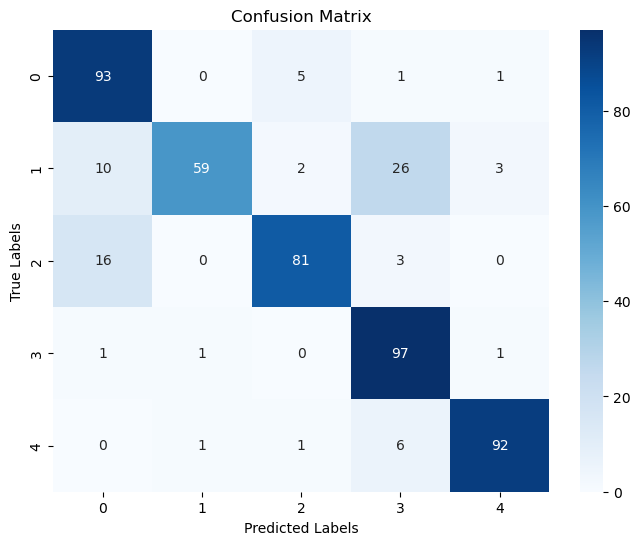

Val loss: 1.061926294118166, Val acc: 0.844
Tiempo total de entrenamiento: 5019.2434 [s]


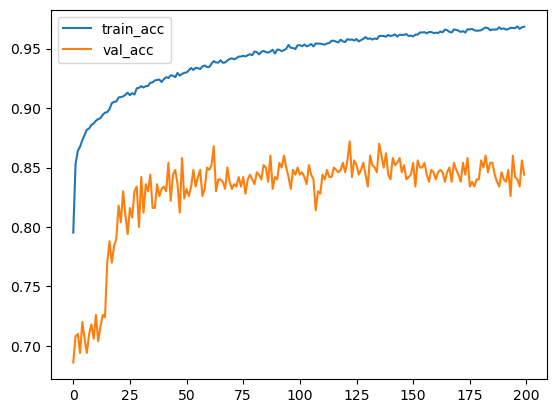

In [9]:
train_loader,val_loader=get_training_loaders(synthetic_SN=fake_wgangp.detach().cpu(),batch_size=32,file_name="stamp_dataset_28.pkl",label_as_strings=False,with_labels=True)
print(torch.bincount(train_loader.dataset.labels.to(torch.int)))
curves=trainer(train_loader,val_loader,epochs=epochs)

15000 

In [10]:
num_img = 15000

gen_1 = Generator(z_dim).to(device)
gen_1.load_state_dict(torch.load('dcgan'))
gen = Generator(z_dim).to(device)
gen.load_state_dict(torch.load('wgangp'))
fake_noise = get_noise(num_img, z_dim, device=device)
fake_dcgan = gen_1(fake_noise)
fake_wgangp= gen(fake_noise)

tensor([14542, 16396, 14523,  9599, 10534])
Epoch 1/200


/home/nfierroflo/anaconda3/envs/gans/lib/python3.11/site-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Val loss: 1.2068145796656609, Val acc: 0.696
Epoch 2/200
Val loss: 1.1848566569387913, Val acc: 0.716
Epoch 3/200
Val loss: 1.194235347211361, Val acc: 0.71
Epoch 4/200
Val loss: 1.1847468838095665, Val acc: 0.72
Epoch 5/200
Val loss: 1.1837200000882149, Val acc: 0.72
Epoch 6/200
Val loss: 1.1930226609110832, Val acc: 0.716
Epoch 7/200
Val loss: 1.1849105656147003, Val acc: 0.712
Epoch 8/200
Val loss: 1.1799554824829102, Val acc: 0.72
Epoch 9/200
Val loss: 1.190814882516861, Val acc: 0.714
Epoch 10/200
Val loss: 1.1793940141797066, Val acc: 0.728
Epoch 11/200
Val loss: 1.185435764491558, Val acc: 0.722
Epoch 12/200
Val loss: 1.1738483160734177, Val acc: 0.73
Epoch 13/200
Val loss: 1.1662835702300072, Val acc: 0.736
Epoch 14/200
Val loss: 1.177517093718052, Val acc: 0.722
Epoch 15/200
Val loss: 1.178171917796135, Val acc: 0.724
Epoch 16/200
Val loss: 1.181041158735752, Val acc: 0.72
Epoch 17/200
Val loss: 1.1699642091989517, Val acc: 0.726
Epoch 18/200
Val loss: 1.1772404611110687, Val 

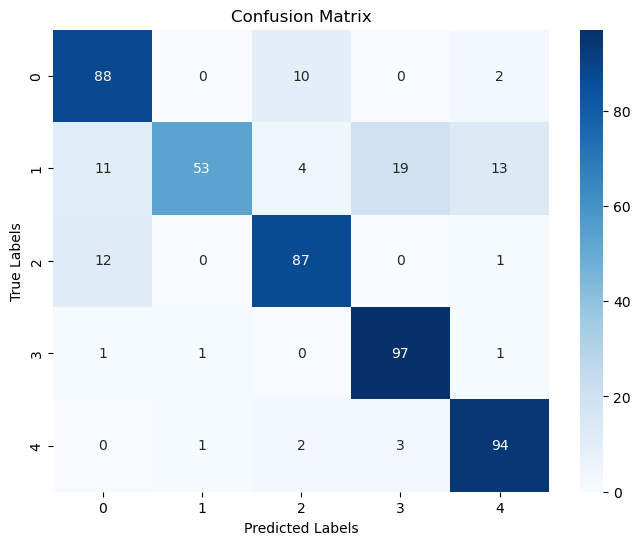

Val loss: 1.0670210272073746, Val acc: 0.838
Tiempo total de entrenamiento: 5430.8522 [s]


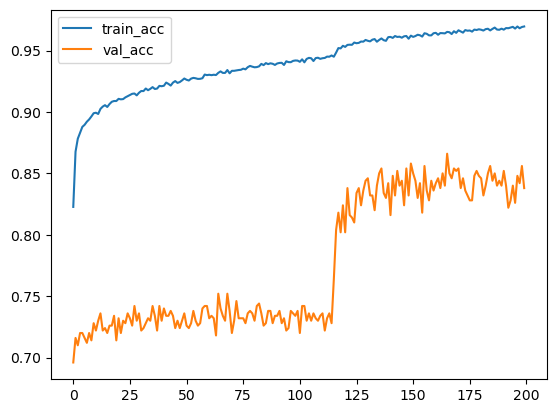

In [11]:
train_loader,val_loader=get_training_loaders(synthetic_SN=fake_dcgan.detach().cpu(),batch_size=32,file_name="stamp_dataset_28.pkl",label_as_strings=False,with_labels=True)
print(torch.bincount(train_loader.dataset.labels.to(torch.int)))
curves=trainer(train_loader,val_loader,epochs=epochs)

tensor([14542, 16396, 14523,  9599, 10534])
Epoch 1/200


/home/nfierroflo/anaconda3/envs/gans/lib/python3.11/site-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Val loss: 1.2010555416345596, Val acc: 0.7
Epoch 2/200
Val loss: 1.1956288069486618, Val acc: 0.704
Epoch 3/200
Val loss: 1.2050677612423897, Val acc: 0.69
Epoch 4/200
Val loss: 1.2002778574824333, Val acc: 0.704
Epoch 5/200
Val loss: 1.1871321648359299, Val acc: 0.718
Epoch 6/200
Val loss: 1.1929321698844433, Val acc: 0.71
Epoch 7/200
Val loss: 1.196722261607647, Val acc: 0.708
Epoch 8/200
Val loss: 1.1790480688214302, Val acc: 0.726
Epoch 9/200
Val loss: 1.1882918253540993, Val acc: 0.714
Epoch 10/200
Val loss: 1.1826456971466541, Val acc: 0.724
Epoch 11/200
Val loss: 1.187976397573948, Val acc: 0.718
Epoch 12/200
Val loss: 1.1896111071109772, Val acc: 0.712
Epoch 13/200
Val loss: 1.180766798555851, Val acc: 0.722
Epoch 14/200
Val loss: 1.1821544170379639, Val acc: 0.718
Epoch 15/200
Val loss: 1.1652511544525623, Val acc: 0.738
Epoch 16/200
Val loss: 1.1356973573565483, Val acc: 0.764
Epoch 17/200
Val loss: 1.1351699270308018, Val acc: 0.764
Epoch 18/200
Val loss: 1.150651678442955, 

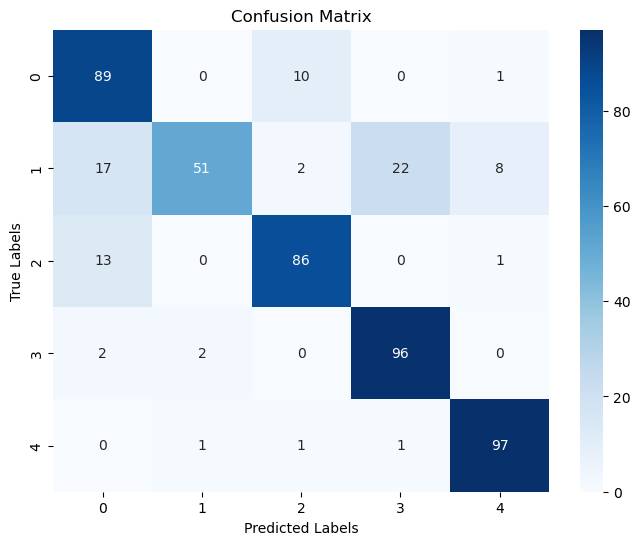

Val loss: 1.0686265975236893, Val acc: 0.838
Tiempo total de entrenamiento: 5642.5882 [s]


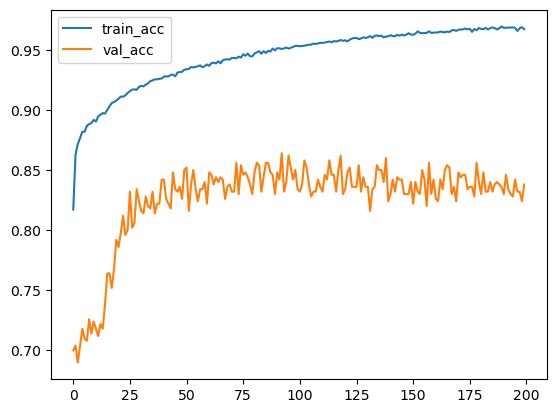

In [12]:
train_loader,val_loader=get_training_loaders(synthetic_SN=fake_wgangp.detach().cpu(),batch_size=32,file_name="stamp_dataset_28.pkl",label_as_strings=False,with_labels=True)
print(torch.bincount(train_loader.dataset.labels.to(torch.int)))
curves=trainer(train_loader,val_loader,epochs=epochs)